In [108]:
#Data Science salary prediction project
#Importing libraries

!pip install country_converter
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

/Users/angelina.aziz/anaplan-kube-operator/.env:source:14: no such file or directory: /Users/angelina.aziz/Downloads/.env.amd64


In [139]:
#importing dataset from https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
#drop salary and salary currency columns and just keep salary converted to USD

df = pd.read_csv('~/downloads/ds_salaries.csv')
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)

In [110]:
#check for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [111]:
#check for duplicates, which we disregard as they are not true duplicates
df.duplicated().sum()

1171

In [112]:
#Data analysis and visualisation

#Break down of job titles in a treemap

df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')           
fig.show()


In [113]:
#table of job titles and their count
jobs=df['job_title'].value_counts()
jobs

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [114]:
#retrieve top 15 job titles
top15_jobs=jobs[:15]
top15_jobs

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: job_title, dtype: int64

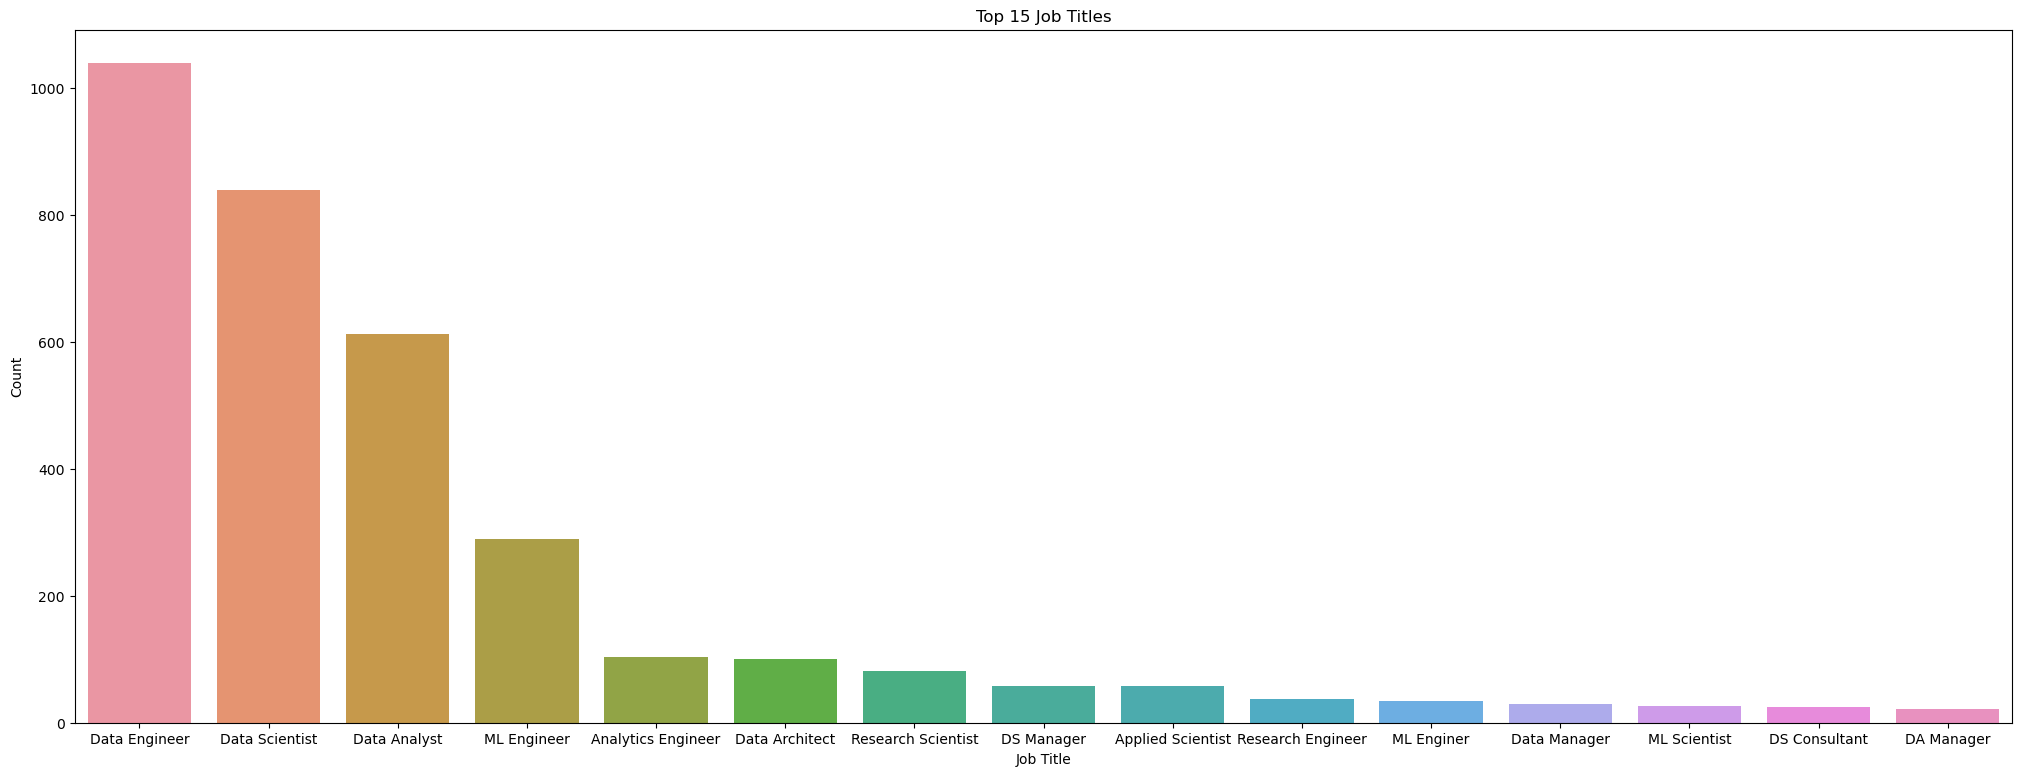

In [115]:
#plot top 15 job titles with labels on x and y axis and title
job_title=['Data Engineer','Data Scientist', 'Data Analyst','ML Engineer', 'Analytics Engineer','Data Architect','Research Scientist', 'DS Manager', 'Applied Scientist','Research Engineer', 'ML Enginer', 'Data Manager','ML Scientist','DS Consultant','DA Manager']
counts=np.array(top15_jobs)
plt.figure(figsize=(25,9))
sns.barplot(x=job_title,y=counts)
plt.ylabel('Count')
plt.xlabel('Job Title')
plt.title('Top 15 Job Titles')
plt.show()

In [117]:
#Breakdown by employment type by full time, part time, contract and freelance 
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Employment Type Distribution')

fig.update_layout( xaxis_title = "Employment Type", yaxis_title = "Count")
fig.show()

In [118]:
#total number of  employee residence countries in dataset
df['employee_residence'].nunique()

#total count per empoyee residence country
df['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [119]:
#Breakdown of top 15 locations by country 
top15_loc=df['employee_residence'].value_counts()[:15]
top15_loc

top_15_emp_locations = df['employee_residence'][:15]
fig = px.bar(y = top15_loc.values, x = top15_loc.index, 
            color = top15_loc.index, text = top15_loc.values,
            title = 'Top 15 Locations of Employees Residences')

fig.update_layout( xaxis_title = "Location of Employees", yaxis_title = "Count")
fig.show()


In [120]:
#plot employee residence country on a choropleth map
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title = 'Employee Residence On Map')
fig.show()

In [121]:
#total number of companies locations in dataset
df['company_location'].nunique()

#total count per company location
df['company_location'].value_counts()


US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [122]:
#Breakdown of top 15 locations by country 
top15_comp_loc=df['company_location'].value_counts()[:15]
top15_comp_loc

top15_comp_locations = df['company_location'][:15]
fig = px.bar(y = top15_comp_loc.values, x = top15_comp_loc.index,
            color = top15_comp_loc.index, text = top15_comp_loc.values,
            title = 'Top 15 Locations of Companies')

fig.update_layout( xaxis_title = "Location of Companies", yaxis_title = "Count")
fig.show()

#plot company location on a choropleth map
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = country
company = df['company_location'].value_counts()
fig = px.choropleth(locations = company.index,
                    color = company.values,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title = 'Company Location On Map')
fig.show()

In [123]:
#plot of top 15 company location count against employee residence location count with labels on x and y axis and title and count displayed
#show count on top of each bar 
fig = go.Figure(data=[
       go.Bar(name='Company Location', x=top15_comp_loc.index, y=top15_comp_loc.values, text=top15_comp_loc.values, textposition='auto'),
       go.Bar(name='Employee Residence Location', x=top15_loc.index, y=top15_loc.values, text=top15_loc.values, textposition='auto')
])

#label x and y axis and title
fig.update_layout(barmode='group', xaxis_title = "Location", yaxis_title = "Count", title = 'Top 15 Company Locations vs Employee Residence Locations')

fig.show()





In [124]:
#treemap for company size
df['company_size'] = df['company_size'].replace('S','Small')
df['company_size'] = df['company_size'].replace('M','Medium')
df['company_size'] = df['company_size'].replace('L','Large')

comp_size = df['company_size'].value_counts()
fig = px.treemap(comp_size, path = [comp_size.index], values = comp_size.values,
                title = 'Company Size')
fig.show()


In [125]:
#a pie chart of work year with percentage shown
work_year = df['work_year'].value_counts()
fig = px.pie(work_year, values = work_year.values, names = work_year.index,
            title = 'Work Year')
fig.show()



In [126]:
#pie chart for remote work with percentage shown where 0 is no remote work, 50 is partial remote work and 100 is full remote work
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']
remote_work = df['remote_ratio'].value_counts()
fig = px.pie(remote_work, values = remote_work.values, names = remote_type,
            title = 'Remote Work Distribution')
fig.show()



In [127]:
# a boxplot of salary in USD with y axis label and title
fig = px.box(y = df['salary_in_usd'], title = 'Salary Distribution in USD')
fig.update_layout(yaxis_title = "Salary in USD")
fig.show()

In [174]:
#show clean dataset
df.head()
df.info()

# remove non us employees
df_clean = df[df['employee_residence'] == 'US']

#remove non us companies
df_clean = df_clean[df_clean['company_location'] == 'US']


#show clean dataset
df_clean.head()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 1 to 3753
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2999 non-null   int64 
 1   experience_level    2999 non-null   object
 2   employment_

In [144]:
#remove non full time employees
df_clean = df_clean[df_clean['employment_type'] == 'FT']

#show clean dataset
df_clean.head()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 5 to 3752
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2991 non-null   int64 
 1   experience_level    2991 non-null   object
 2   employment_type     2991 non-null   object
 3   job_title           2991 non-null   object
 4   salary_in_usd       2991 non-null   int64 
 5   employee_residence  2991 non-null   object
 6   remote_ratio        2991 non-null   int64 
 7   company_location    2991 non-null   object
 8   company_size        2991 non-null   object
dtypes: int64(3), object(6)
memory usage: 233.7+ KB


In [147]:
#polar scatter plot of remote work ratio for 2020, 2021, 2022 and 2023 with legend
remote_year = df_clean.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
title = 'Remote Work Ratio by Work Year'
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.show()

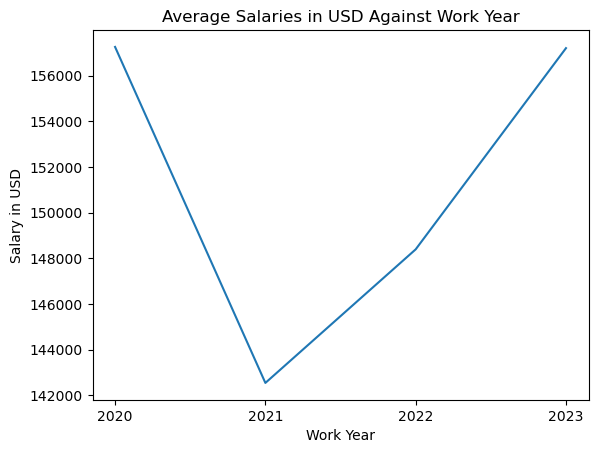

In [158]:
#average salary by work year
avg_salary = df_clean.groupby('work_year')['salary_in_usd'].mean()
avg_salary

#plot average salary by work year on a line chart
year_based_salary=df_clean['salary_in_usd'].groupby(df_clean['work_year']).mean()
plt.title("Average Salaries in USD Against Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()




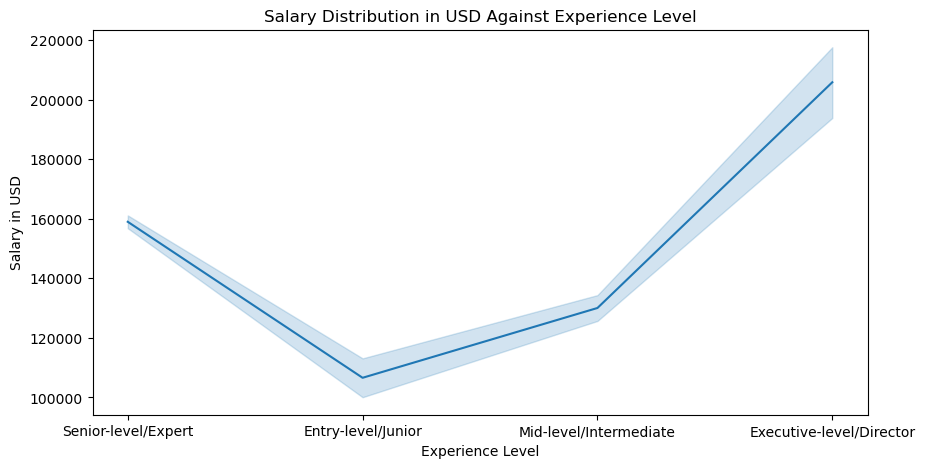

In [168]:
#print count of values per experience level (The graph in this kernel is not used)
df_clean['experience_level'].value_counts()

df_clean['experience_level'] = df_clean['experience_level'].replace('EN','Entry-level/Junior')
df_clean['experience_level'] = df_clean['experience_level'].replace('MI','Mid-level/Intermediate')
df_clean['experience_level'] = df_clean['experience_level'].replace('SE','Senior-level/Expert')
df_clean['experience_level'] = df_clean['experience_level'].replace('EX','Executive-level/Director')

#plot a line histogram of salary in USD against experience level where SE is Senior Level/Expert, MI is Mid Level/Intermediate, EN is Entry Level/Junior and EX is Executive Level/Director
plt.figure(figsize=(10,5))
plt.title("Salary Distribution in USD Against Experience Level")
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
sns.lineplot(x=df_clean['experience_level'],y=df_clean['salary_in_usd'])
plt.show()



In [169]:
#histogram of salary in USD against experience level
exp_salary = df_clean[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Average Salary by Experience Level'))

fig.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")

fig.show()


In [172]:
#histogram of salary in USD against company size
company_size = df_clean[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]


fig= go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (USD)")
fig.show()

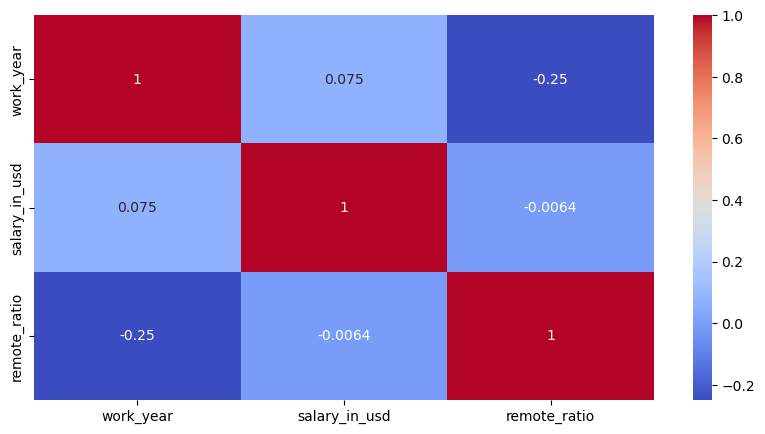

In [173]:
#correlation matrix of all  variables in the dataset - this was not used in thereport
df_clean.corr()

#heatmap of correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()


In [276]:
#imports
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#convert categorical variables to numerical variables
df_clean['company_size'] = le.fit_transform(df_clean['company_size'])


#convert job title to numerical variables by iterating through the job title column and assigning a number to each job title
job_title = df_clean['job_title'].unique()
job_title_dict = {}
for i in range(len(job_title)):
    job_title_dict[job_title[i]] = i
df_clean['job_title'] = df_clean['job_title'].map(job_title_dict)



In [277]:
# split data into train and test sets with 85% of data in train set and 15% in test set
from sklearn.model_selection import train_test_split
X = df_clean.drop('salary_in_usd', axis = 1)
y = df_clean['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

X_train['company_size'] = le.fit_transform(X_train['company_size']).astype('int64')
X_test['company_size'] = le.transform(X_test['company_size']).astype('int64')

print(X_train.dtypes)

work_year           int64
experience_level    int64
job_title           int64
remote_ratio        int64
company_size        int64
dtype: object


In [278]:
#scale data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
#Linear Regression Model - iteration 1

#imports for LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

#train model
lm = LinearRegression()
lm.fit(X_train,y_train)

#predict test data
lm_predictions = lm.predict(X_test)


#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table 
from IPython.display import display, HTML
df_lm = pd.DataFrame({'Model Name': 'Linear Regression - iteration 1', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, lm_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, lm_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)), 'Accuracy': lm.score(X_test, y_test)}, index=[0])
df_lm.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_lm




,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Linear Regression - iteration 1,41446.478,3014330025.125,54902.915,0.061


In [316]:
#polynomial regression model - iteration 1

#imports for Polynomial Regression from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#train model
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train, y_train)

#predict test data
poly_predictions = poly_model.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_poly = pd.DataFrame({'Model Name': 'Polynomial Regression - iteration 1', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, poly_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, poly_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, poly_predictions)), 'Accuracy': poly_model.score(X_test, y_test)}, index=[0])
df_poly.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_poly

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Polynomial Regression - iteration 1,40819.569,2951113104.710,54324.148,0.081


In [375]:
#polynomial regression model - iteration 2

#train model
poly_2model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_2model.fit(X_train, y_train)

#predict test data
poly_2predictions = poly_2model.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_poly2 = pd.DataFrame({'Model Name': 'Polynomial Regression - iteration 2', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, poly_2predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, poly_2predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, poly_2predictions)), 'Accuracy': poly_2model.score(X_test, y_test)}, index=[0])
df_poly2.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_poly2


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Polynomial Regression - iteration 2,40556.949,2893907109.297,53795.047,0.099


In [332]:
#polynomial regression model - iteration 3

#train model
poly_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly_model.fit(X_train, y_train)

#predict test data
poly_predictions = poly_model.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_poly = pd.DataFrame({'Model Name': 'Polynomial Regression - iteration 3', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, poly_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, poly_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, poly_predictions)), 'Accuracy': poly_model.score(X_test, y_test)}, index=[0])
df_poly.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_poly

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Polynomial Regression - iteration 3,40953.269,2950324950.984,54316.894,0.081


In [360]:

#random forest regression model - iteration 1

#train model
rf = RandomForestRegressor(n_estimators = 100, random_state = 10)
rf.fit(X_train, y_train)

#predict test data
rf_predictions = rf.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_rf = pd.DataFrame({'Model Name': 'Random Forest Regression - iteration 1', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, rf_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, rf_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)), 'Accuracy': rf.score(X_test, y_test)}, index=[0])
df_rf.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_rf

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Random Forest Regression - iteration 1,38442.832,2673637345.193,51707.227,0.167


In [361]:

#random forest regression model - iteration 2

#train model
rf_2 = RandomForestRegressor(n_estimators = 200, random_state = 10)
rf_2.fit(X_train, y_train)

#predict test data
rf_2_predictions = rf_2.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_rf_2 = pd.DataFrame({'Model Name': 'Random Forest Regression - iteration 2', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, rf_2_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, rf_2_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, rf_2_predictions)), 'Accuracy': rf_2.score(X_test, y_test)}, index=[0])
df_rf_2.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_rf_2

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Random Forest Regression - iteration 2,38450.227,2677216749.848,51741.828,0.166


In [362]:

#random forest regression model - iteration 3

#train model
rf_3 = RandomForestRegressor(n_estimators = 800, random_state = 10)
rf_3.fit(X_train, y_train)

#predict test data
rf_3_predictions = rf_3.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_rf_3 = pd.DataFrame({'Model Name': 'Random Forest Regression - iteration 3', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, rf_3_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, rf_3_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, rf_3_predictions)), 'Accuracy': rf_3.score(X_test, y_test)}, index=[0])
df_rf_3.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_rf_3

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Random Forest Regression - iteration 3,38436.422,2678658270.739,51755.756,0.166


In [363]:
#table of all iterations of random forest regression model

df_rf = pd.DataFrame({'Model Name': ['Random Forest Regression - iteration 1', 'Random Forest Regression - iteration 2', 'Random Forest Regression - iteration 3'], 'Mean Absolute Error': [metrics.mean_absolute_error(y_test, rf_predictions), metrics.mean_absolute_error(y_test, rf_2_predictions), metrics.mean_absolute_error(y_test, rf_3_predictions)], 'Mean Squared Error': [metrics.mean_squared_error(y_test, rf_predictions), metrics.mean_squared_error(y_test, rf_2_predictions), metrics.mean_squared_error(y_test, rf_3_predictions)], 'Root Mean Squared Error': [np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)), np.sqrt(metrics.mean_squared_error(y_test, rf_2_predictions)), np.sqrt(metrics.mean_squared_error(y_test, rf_3_predictions))], 'Accuracy': [rf.score(X_test, y_test), rf_2.score(X_test, y_test), rf_3.score(X_test, y_test)]}, index=[0,1,2])
df_rf.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_rf


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Random Forest Regression - iteration 1,38442.832,2673637345.193,51707.227,0.167
1,Random Forest Regression - iteration 2,38450.227,2677216749.848,51741.828,0.166
2,Random Forest Regression - iteration 3,38436.422,2678658270.739,51755.756,0.166


In [364]:
#gradient boosting regression model (XGBoost) - iteration 1

#imports for XGBoost from sklearn
from xgboost import XGBRegressor

#train model
xgb = XGBRegressor(n_estimators = 100, random_state = 10)
xgb.fit(X_train, y_train)

#predict test data
xgb_predictions = xgb.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_xgb = pd.DataFrame({'Model Name': 'XGBoost Regression - iteration 1', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, xgb_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, xgb_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, xgb_predictions)), 'Accuracy': xgb.score(X_test, y_test)}, index=[0])
df_xgb.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_xgb


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,XGBoost Regression - iteration 1,39063.584,2808008014.434,52990.641,0.126


In [370]:
#gradient boosting regression model (XGBoost) - iteration 2

# imports to tune hyperparameters
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0]
}

# create the XGBoost model
xgb_1 = XGBRegressor(random_state=10)

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(xgb_1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# train the model with the best hyperparameters
xgb_1best = grid_search.best_estimator_
xgb_1best.fit(X_train, y_train)

# predict test data
xgb_1predictions = xgb_best.predict(X_test)

# display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_xgb1 = pd.DataFrame({'Model Name': 'XGBoost Regression - iteration 2', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, xgb_1predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, xgb_1predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, xgb_1predictions)), 'Accuracy': xgb_1best.score(X_test, y_test)}, index=[0])
df_xgb1.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_xgb1



,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,XGBoost Regression - iteration 2,37715.147,2607460372.162,51063.298,0.188


In [379]:
#ensemble model -iteration 1 of random forest -- iteration 1, polynomial regression -- iteration 2 and XGBoost -- iteration 2

#train model
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor([('rf', rf_2), ('poly', poly_2model), ('xgb', xgb_1best)])
voting_reg.fit(X_train, y_train)

#predict test data
voting_predictions = voting_reg.predict(X_test)

#display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_voting = pd.DataFrame({'Model Name': 'Ensemble Model - iteration 1', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, voting_predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, voting_predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, voting_predictions)), 'Accuracy': voting_reg.score(X_test, y_test)}, index=[0])
df_voting.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_voting


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Accuracy
0,Ensemble Model - iteration 1,37894.578,2612352431.954,51111.177,0.187


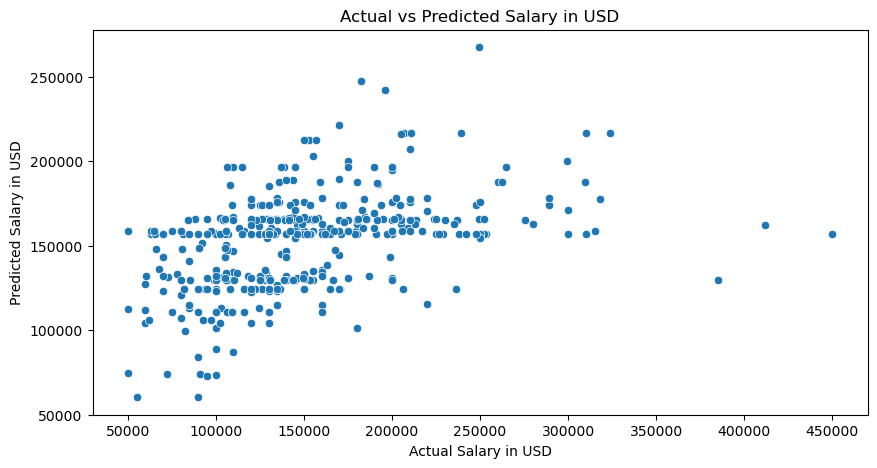

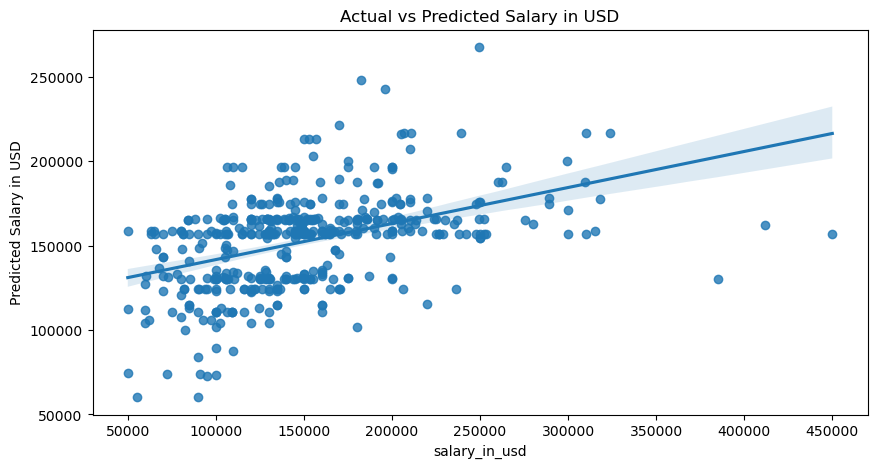

In [383]:
#gradient boosting regression model (XGBoost) - iteration 2

# imports to tune hyperparameters
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0]
}

# create the XGBoost model
xgb_1 = XGBRegressor(random_state=10)

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(xgb_1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# train the model with the best hyperparameters
xgb_1best = grid_search.best_estimator_
xgb_1best.fit(X_train, y_train)

# predict test data
xgb_1predictions = xgb_best.predict(X_test)

# display the mean absolute error, mean squared error and root mean squared error and accuracy of the model in a  dataframe table
df_xgb1 = pd.DataFrame({'Model Name': 'XGBoost Regression - iteration 2', 'Mean Absolute Error': metrics.mean_absolute_error(y_test, xgb_1predictions), 'Mean Squared Error': metrics.mean_squared_error(y_test, xgb_1predictions), 'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, xgb_1predictions)), 'Accuracy': xgb_1best.score(X_test, y_test)}, index=[0])
df_xgb1.style.set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[:, ['Model Name', 'Accuracy']]).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
df_xgb1


#data visualisation of perfromance of gradient boosting regression model (XGBoost) - iteration 2

#plot of actual vs predicted salary in USD
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted Salary in USD")
plt.xlabel('Actual Salary in USD')
plt.ylabel('Predicted Salary in USD')
sns.scatterplot(x=y_test,y=xgb_1predictions)
plt.show()

#plot of actual vs predicted salary in USD with a line of best fit
plt.figure(figsize=(10,5))
plt.title("Actual vs Predicted Salary in USD")
plt.xlabel('Actual Salary in USD')
plt.ylabel('Predicted Salary in USD')
sns.regplot(x=y_test,y=xgb_1predictions)
plt.show()




In [385]:

#table of actual vs predicted salary in USD
df_xgb1 = pd.DataFrame({'Actual Salary in USD': y_test, 'Predicted Salary in USD': xgb_1predictions})
df_xgb1.head(10)


,Actual Salary in USD,Predicted Salary in USD
1887,155000,165684.938
1205,85000,112824.281
1729,100000,157641.531
2439,78000,133129.734
2177,100000,129935.602
2385,150000,158843.500
2791,131300,164397.641
2415,109000,110524.375
2101,130000,165684.938
1241,115934,124395.203


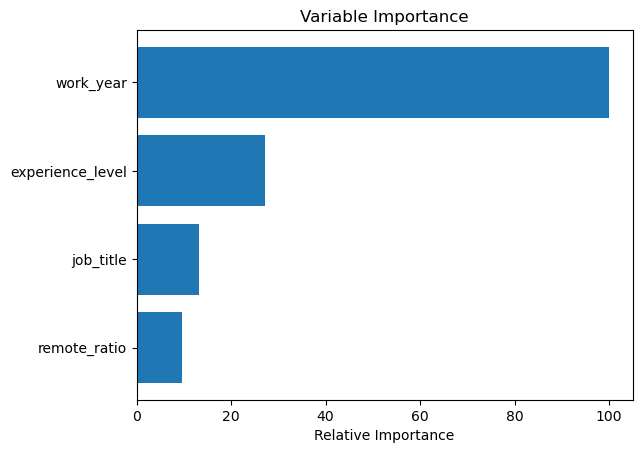

In [387]:
#feature importance plot
feature_importance = xgb_1best.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


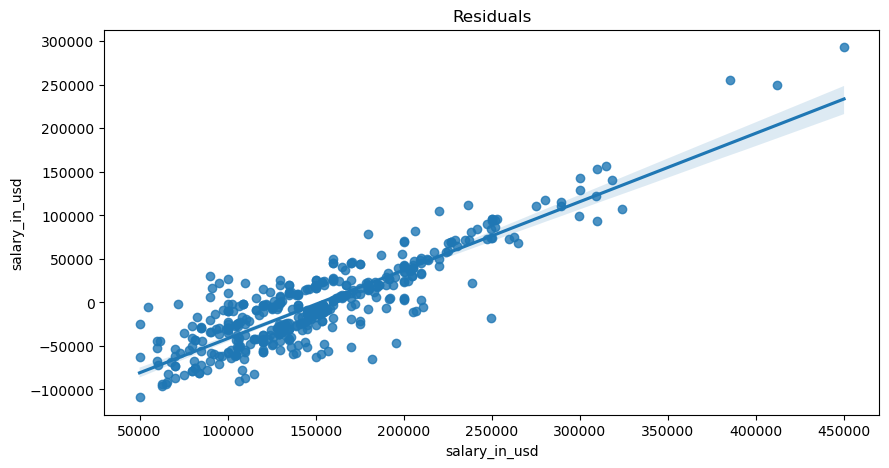

In [396]:

#residual plot
plt.figure(figsize=(10,5))
plt.title("Residuals")
plt.xlabel('Actual Salary in USD')
plt.ylabel('Residuals')
sns.regplot(x=y_test,y=y_test-xgb_1predictions)
plt.show()
